# Label Encoder

In [7]:
import pandas as pd

df = pd.DataFrame({'A' : ['a', 'b', 'c', 'a', 'b'],
                  'B' : (1, 2, 3, 1, 0)})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])

le.classes_

array(['a', 'b', 'c'], dtype=object)

In [9]:
le.transform(df['A'])

array([0, 1, 2, 0, 1])

In [10]:
df['le_A'] = le.transform(df['A'])

df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


In [11]:
le.fit_transform(df['A'])

array([0, 1, 2, 0, 1])

In [12]:
le.inverse_transform(df['le_A'])

array(['a', 'b', 'c', 'a', 'b'], dtype=object)

# Min-Max Scaler

In [13]:
import pandas as pd

df = pd.DataFrame({
    'A' : [10, 20, -10, 0, 25],
    'B' : [1, 2, 3, 1, 0]
})

df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


In [14]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [15]:
mms.data_max_, mms.data_min_

(array([25.,  3.]), array([-10.,   0.]))

In [16]:
df_mms = mms.transform(df)

df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [17]:
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

In [18]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

# StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [20]:
ss.mean_, ss.scale_

(array([9. , 1.4]), array([12.80624847,  1.0198039 ]))

In [21]:
ss.transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [22]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

In [23]:
df = pd.DataFrame({
    'A' : [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5.0]
})

df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


# RobustScaler

In [24]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
rs.fit(df)

RobustScaler()

In [25]:
rs.feature_names_in_

array(['A'], dtype=object)

In [26]:
rs.transform(df)

array([[-0.44444444],
       [-0.33333333],
       [-0.22222222],
       [-0.11111111],
       [ 0.        ],
       [ 0.11111111],
       [ 0.77777778],
       [ 0.88888889],
       [ 5.22222222]])

# MinMaxScaler, StandardScaler, RobustScaler 비교

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df_scaler = df.copy()

df_scaler['MinMax'] = mms.fit_transform(df)
df_scaler['Standard'] = ss.fit_transform(df)
df_scaler['Robust'] = rs.fit_transform(df)

df_scaler

,A,MinMax,Standard,Robust
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


<Axes: >

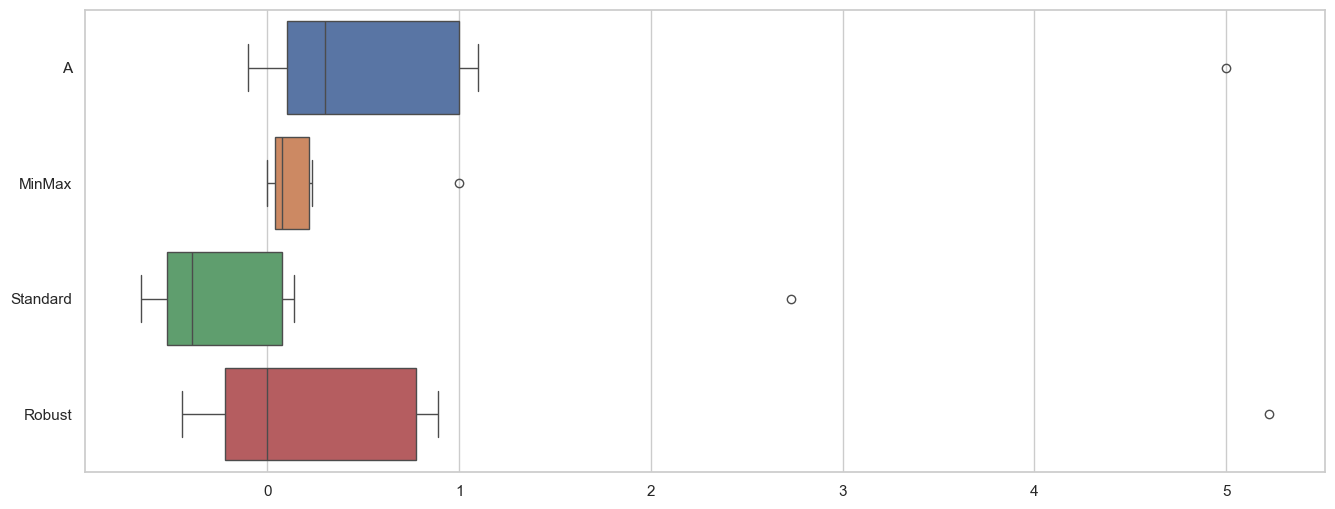

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

plt.figure(figsize=(16,6))
sns.boxplot(data=df_scaler, orient='h')